In [5]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
dayte_tank = ["https://genius.com/albums/Daite-tank/Album-that-doesnt-count",
         "https://genius.com/albums/Daite-tank/Time-to-collect-rubble",
         "https://genius.com/albums/Daite-tank/Universamka",
         "https://genius.com/albums/Daite-tank/Young",
         "https://genius.com/albums/Daite-tank/Save-as",
         "https://genius.com/albums/Daite-tank/Intim",
         "https://genius.com/albums/Daite-tank/Eyes-are-scared",
         "https://genius.com/albums/Daite-tank/Fire-fm",
         "https://genius.com/albums/Daite-tank/1-see-fig-1",
         "https://genius.com/albums/Daite-tank/2-see-fig-2",
         "https://genius.com/albums/Daite-tank/For-growth",
         "https://genius.com/albums/Daite-tank/Man-hours",
         "https://genius.com/albums/Daite-tank/Parasite-words"]

In [7]:
mnogoznaal = ["https://genius.com/albums/Mnogoznaal/March-of-elephants",
             "https://genius.com/albums/Mnogoznaal/Iferus-prequel",
             "https://genius.com/albums/Mnogoznaal/K-ts-ost",
             "https://genius.com/albums/Mnogoznaal/Iferus-white-valleys",
             "https://genius.com/albums/Mnogoznaal/Night-suncatcher",
             "https://genius.com/albums/Mnogoznaal/Hotel-cosmos",
             "https://genius.com/albums/Mnogoznaal/Circle-of-winds"]

In [8]:
sektor_gaza = [
    "https://genius.com/albums/Sektor-gaza/Evil-dead",
    "https://genius.com/albums/Sektor-gaza/Vigorous-louse",
    "https://genius.com/albums/Sektor-gaza/Night-before-christmas",
    "https://genius.com/albums/Sektor-gaza/Collective-farm-punk",
    "https://genius.com/albums/Sektor-gaza/Relax-man",
    "https://genius.com/albums/Sektor-gaza/Gas-sector",
    "https://genius.com/albums/Sektor-gaza/Press-the-gas",
    "https://genius.com/albums/Sektor-gaza/Kashchey-bessmertny",
    "https://genius.com/albums/Sektor-gaza/Dances-after-sex",
    "https://genius.com/albums/Sektor-gaza/Gas-attack",
    "https://genius.com/albums/Sektor-gaza/Narcological-university-of-millions",
    "https://genius.com/albums/Sektor-gaza/Hellraiser"
]

In [9]:
ianndior = [
    "https://genius.com/albums/Iann-dior/Rebirth",
    "https://genius.com/albums/Iann-dior/A-dance-with-the-devil",
    "https://genius.com/albums/Iann-dior/Nothings-ever-good-enough",
    "https://genius.com/albums/Iann-dior/Industry-plant",
    "https://genius.com/albums/Iann-dior/Im-gone",
    "https://genius.com/albums/Iann-dior/Still-here",
    "https://genius.com/albums/Iann-dior/On-to-better-things",
    "https://genius.com/albums/Iann-dior/Id3"
]

In [10]:
reg1 = re.compile(r"\u2005")
reg2 = re.compile(r'\[[^\[\]]*\]')
rus_stopwords = stopwords.words("russian")
rus_stopwords.append("это")
rus_stopwords.append("всё")
eng_stopwords = stopwords.words("english")
tokenizer = RegexpTokenizer(r'\w+')

def get_songs_from_albums(albums):
    links = []
    for url in tqdm(albums):
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        links.append(list(map(lambda x: x["href"], soup.find_all('a', class_ = "u-display_block"))))
    return links

def get_words_from_album(links, lang):

    bag = []
    if lang == 'RUS':
        stopwords_ = rus_stopwords
    else:
        stopwords_ = eng_stopwords
        
    for album in tqdm(links):
        for url in album:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            try:
                s = soup.find('div', class_ = "Lyrics__Container-sc-1ynbvzw-5").text.lower()
            except AttributeError:
                print("Oups!..")
                continue
            s = re.sub(reg2, " ", s)
            s = re.sub(reg1, " ", s)
            words = tokenizer.tokenize(s)
            result = [word for word in words if word not in stopwords_]
            bag.append(Counter(result))
    return bag

def get_word_cloud(albums, lang='RUS'):
    """Сформируйте список, состоящих из ссылок на альбомы с сайта genious. см. пример выше."""
    links = get_songs_from_albums(albums)
    res =  sum(get_words_from_album(links, lang), Counter())
    wordcloud = WordCloud(width=1000,
                        height=800,
                        background_color='black',
                        min_font_size=10,
                        colormap="spring",
                     max_words=150)

    wordcloud.generate_from_frequencies(frequencies=dict(res))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return res

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

Oups!..


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:46<00:00, 13.31s/it]


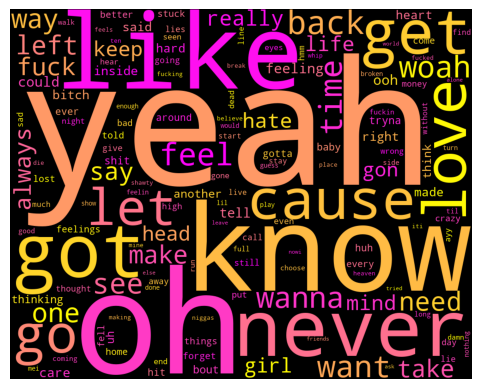

In [11]:
get_word_cloud(ianndior, 'ENG');

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:47<00:00, 18.93s/it]


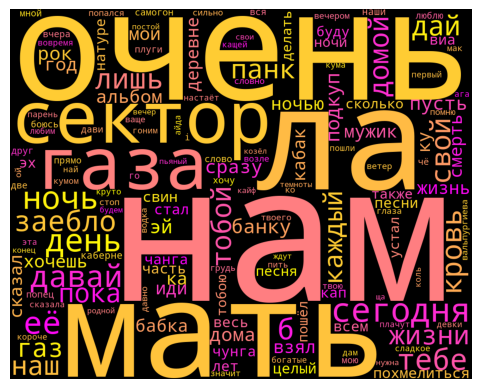

In [12]:
get_word_cloud(sektor_gaza);

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:52<00:00,  8.66s/it]


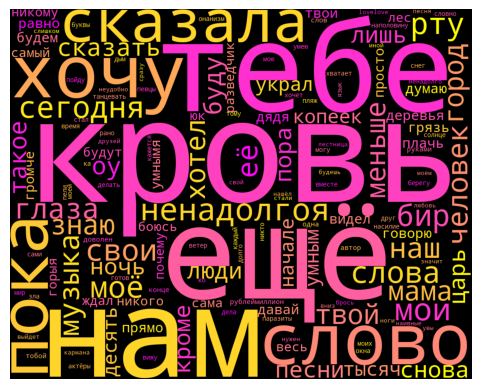

In [13]:
get_word_cloud(dayte_tank);